In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv = datasets.fetch_olivetti_faces()

In [6]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [7]:
oliv.data.shape

(400, 4096)

In [8]:
oliv.images.shape

(400, 64, 64)

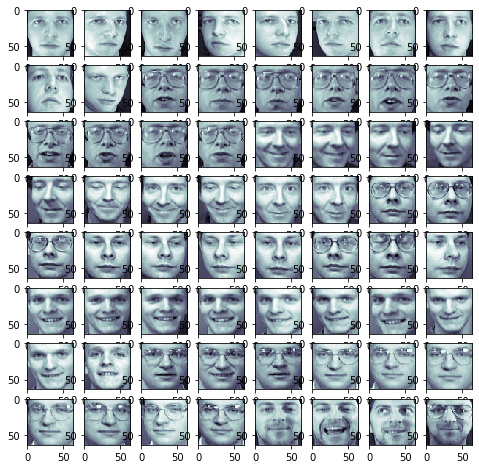

In [10]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [11]:
x = oliv.data
y = oliv.target

pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_.shape

(400, 4096)

In [17]:
k = 0
total = sum(pca.explained_variance_)
curr_sum = 0
while(curr_sum/total < .95):
    curr_sum += pca.explained_variance_[k]
    k+=1
k

123

In [18]:
pca = PCA(n_components = k) # Try whiten = True in case of images for better results
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [19]:
#Getting Original Images back
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [20]:
# need to reshape data to 64x64
x_approx_images = x_approx.reshape((400, 64, 64))
x_approx_images.shape

(400, 64, 64)

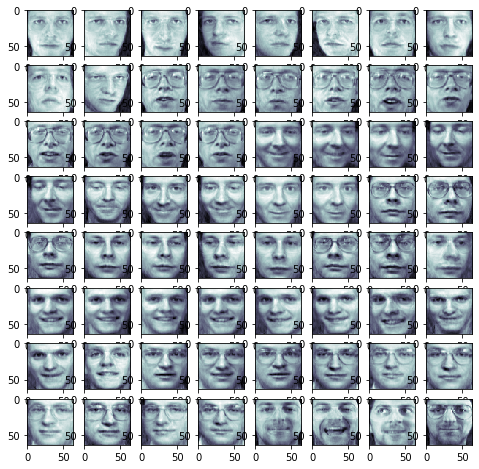

In [21]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

In [22]:
 #Printing Eigen Faces
eigenv = pca.components_

In [23]:
eigenv.shape

(123, 4096)

In [24]:
eigen_faces = eigenv.reshape((123, 64, 64))

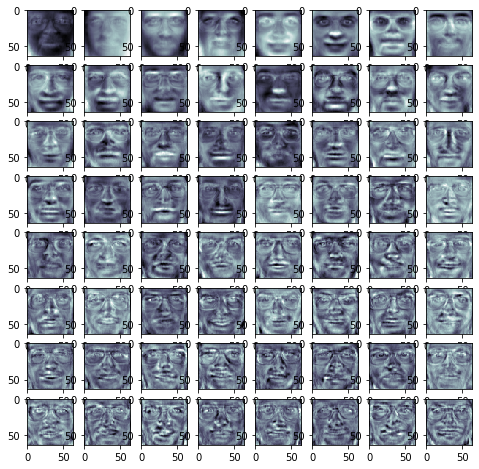

In [25]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigen_faces[i], cmap = plt.cm.bone)
plt.show()